In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
data = pd.read_csv("train.csv")
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
y = data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X = data.drop('Survived', axis=1)
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
for column in X.columns:
  print(f"{column:>12} {len(set(X[column])):4} {X[column].dtypes}")


 PassengerId  891 int64
      Pclass    3 int64
        Name  891 object
         Sex    2 object
         Age  265 float64
       SibSp    7 int64
       Parch    7 int64
      Ticket  681 object
        Fare  248 float64
       Cabin  148 object
    Embarked    4 object


In [ ]:
indesejadas = ['PassengerId', 'Name', 'Ticket', 'Cabin'] # não são úteis ou possuem muita variação de dados
Xdrop = X.drop(indesejadas, axis=1)
Xdrop.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
Xnum = Xdrop.select_dtypes('number')
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
for column in Xnum.columns:
  print(f"{column:>12} {sum(Xnum[column].isnull())}")

      Pclass 0
         Age 177
       SibSp 0
       Parch 0
        Fare 0


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
XnumLimpo = imputer.fit_transform(Xnum)
XnumLimpo

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [ ]:
Xcat = Xdrop.select_dtypes('object')
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
for column in Xcat.columns:
  print(f"{column:>12} {sum(Xcat[column].isnull())}")

         Sex 0
    Embarked 2


In [ ]:
imputer = SimpleImputer(strategy="most_frequent")
XcatLimpo = imputer.fit_transform(Xcat)
XcatLimpo

array([['male', 'S'],
       ['female', 'C'],
       ['female', 'S'],
       ...,
       ['female', 'S'],
       ['male', 'C'],
       ['male', 'Q']], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
XcatHot = encoder.fit_transform(XcatLimpo)
XcatHot

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [ ]:
XcatHot.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [ ]:
import numpy as np
Xtratado = np.c_[XnumLimpo, XcatHot.toarray()]
Xtratado.shape


(891, 10)

In [ ]:
Xtratado

array([[ 3., 22.,  1., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.columns.isin(test.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
train.columns[~train.columns.isin(test.columns)]

Index(['Survived'], dtype='object')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosDesejados(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasIndesejadas_ = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    return self
  def transform(self, X, y=None):
    return X.drop(self.colunasIndesejadas_, axis=1)

atributosDesejados = AtributosDesejados()
Xdrop = atributosDesejados.fit_transform(X) # aqui chamamos o método fit_transform sem ele ter sido implementado anteriormente. Isso é possível devido ao TransformerMixin já ter esse método por padrão, havendo um fit e um transform implementados no código o TransformerMixin chamará um depois o outro
Xdrop.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
class AtributosNumericos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasNumericas = X.select_dtypes(include='number').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasNumericas]

atributosNumericos = AtributosNumericos()
Xnum = atributosNumericos.fit_transform(Xdrop)
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipenum = Pipeline([
    ('atributos_numericos', AtributosNumericos()),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

XnumLimpo = pipenum.fit_transform(Xdrop)
XnumLimpo

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [ ]:
class AtributosCategoricos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasCategoricas = X.select_dtypes(include='object').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasCategoricas]

atributosCategoricos = AtributosCategoricos()
Xcat = atributosCategoricos.fit_transform(Xdrop)
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

pipecat = Pipeline([
    ('atributos_numericos', AtributosCategoricos()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

XcatLimpo = pipecat.fit_transform(Xdrop)
XcatLimpo.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [ ]:
from sklearn.pipeline import FeatureUnion

uneAtributos = FeatureUnion([
    ('pipenum', pipenum),
    ('pipecat', pipecat)
])

Xtratado = uneAtributos.fit_transform(Xdrop)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
from sklearn.pipeline import Pipeline

preProcessamento = Pipeline([
    ('atributos_desejados', AtributosDesejados()),
    ('une_atributos', uneAtributos)
    ])

Xtratado = preProcessamento.fit_transform(X)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('arvore', DecisionTreeClassifier())
])

pipetotal.fit(X,y)
ypred = pipetotal.predict(X)
accuracy_score(y, ypred)

0.9797979797979798

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.04107261, 0.04292345, 0.01989245, 0.01866531, 0.01615429]),
  'score_time': array([0.01806855, 0.0201869 , 0.00688124, 0.00694299, 0.00930834]),
  'test_score': array([0.73743017, 0.79213483, 0.80898876, 0.73033708, 0.80337079])},
 0.7744523256543846)

In [ ]:
pipetotal.fit(X, y)
ypred = pipetotal.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('tree_submission.csv', index=False)

In [ ]:
# o resultado do teste foi ruim (0,73) então vamos tentar ajustar hiperparametros para melhorar a pontuação

from sklearn.model_selection import GridSearchCV

parametros = {
    'arvore__max_depth': [None] + list(range(1, 10, 2)),
    'preProcessamento__une_atributos__pipenum__imputer__strategy': ['mean', 'median', 'most_frequent']
    }

modelo = GridSearchCV(pipetotal, param_grid=parametros)

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([2.74632359, 3.47671032, 2.98286176, 2.2309258 , 2.1938889 ]),
  'score_time': array([0.01010895, 0.00939775, 0.00661469, 0.00650454, 0.00686455]),
  'test_score': array([0.81564246, 0.82022472, 0.81460674, 0.78089888, 0.83146067])},
 0.8125666938673028)

In [ ]:
modelo.fit(X, y)
modelo.best_estimator_

Pipeline(steps=[('preProcessamento',
                 Pipeline(steps=[('atributos_desejados', AtributosDesejados()),
                                 ('une_atributos',
                                  FeatureUnion(transformer_list=[('pipenum',
                                                                  Pipeline(steps=[('atributos_numericos',
                                                                                   AtributosNumericos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='median')),
                                                                                  ('scaler',
                                                                                   StandardScaler())])),
                                                                 ('pipecat',
                                                                  Pipeline(steps=[('atributos_numericos',
                                                                                   AtributosCategoricos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('encoder',
                                                                                   OneHotEncoder())]))]))])),
                ('arvore', DecisionTreeClassifier(max_depth=5))])

In [ ]:
submission = pd.read_csv('gender_submission.csv')
ypred = modelo.predict(test)
submission['Survived'] = ypred
submission.to_csv('tree_gscv_submission.csv', index=False)

# Atividade 2

In [ ]:
# vamos testar outras possibilidades de classificadores para obter melhores pontuações

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('floresta', RandomForestClassifier(class_weight='balanced', random_state=42))
])

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.31492352, 0.2929976 , 0.30803967, 0.31679821, 0.31524873]),
  'score_time': array([0.01723075, 0.01534534, 0.01555705, 0.01572657, 0.01582456]),
  'test_score': array([0.7877095 , 0.80898876, 0.84269663, 0.78651685, 0.82022472])},
 0.8092272926997678)

In [ ]:
# XGBoost

from xgboost import XGBClassifier

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('gradiente', XGBClassifier())
])

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.0626235 , 0.06300044, 0.06015444, 0.06457853, 0.06363893]),
  'score_time': array([0.01080775, 0.01081967, 0.01062441, 0.01549029, 0.01267648]),
  'test_score': array([0.7877095 , 0.82022472, 0.85955056, 0.78651685, 0.84831461])},
 0.8204632477559475)

In [ ]:
# SVM

from sklearn.svm import SVC

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('svm', SVC())
])

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.04038048, 0.04158688, 0.04691792, 0.04350591, 0.04753113]),
  'score_time': array([0.00964904, 0.0161097 , 0.0158987 , 0.01450658, 0.01427197]),
  'test_score': array([0.82681564, 0.8258427 , 0.81460674, 0.81460674, 0.85955056])},
 0.8282844768062269)

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('knn', KNeighborsClassifier())
])

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.02242613, 0.0254941 , 0.01857424, 0.01921487, 0.02430844]),
  'score_time': array([0.13869023, 0.08951044, 0.13380909, 0.19263005, 0.19525766]),
  'test_score': array([0.7877095 , 0.76966292, 0.83146067, 0.8258427 , 0.8258427 ])},
 0.8081036971941499)

In [ ]:
# o método Support Vector Machines se mostrou o mais promissor, vamos tentar trabalhar hiperparametros com ele

pipetotal = Pipeline([
    ('preProcessamento', preProcessamento),
    ('svm', SVC())
])

parametros = {
    'preProcessamento__une_atributos__pipenum__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__decision_function_shape': ['ovo', 'ovr']
    }

modelo = GridSearchCV(pipetotal, param_grid=parametros, cv=5)

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])


({'fit_time': array([22.6159544 , 12.13508463, 13.05538893, 10.37147188, 11.1434536 ]),
  'score_time': array([0.00992131, 0.00995278, 0.00956392, 0.01386333, 0.00962567]),
  'test_score': array([0.82681564, 0.8258427 , 0.81460674, 0.75842697, 0.85955056])},
 0.817048521750047)

In [ ]:
modelo.fit(X, y)
modelo.best_estimator_

Pipeline(steps=[('preProcessamento',
                 Pipeline(steps=[('atributos_desejados', AtributosDesejados()),
                                 ('une_atributos',
                                  FeatureUnion(transformer_list=[('pipenum',
                                                                  Pipeline(steps=[('atributos_numericos',
                                                                                   AtributosNumericos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer()),
                                                                                  ('scaler',
                                                                                   StandardScaler())])),
                                                                 ('pipecat',
                                                                  Pipeline(steps=[('atributos_numericos',
                                                                                   AtributosCategoricos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('encoder',
                                                                                   OneHotEncoder())]))]))])),
                ('svm', SVC(C=1, decision_function_shape='ovo'))])

In [ ]:
submission = pd.read_csv('gender_submission.csv')
ypred = modelo.predict(test)
submission['Survived'] = ypred
submission.to_csv('svm_gscv_submission.csv', index=False)

## Resultado

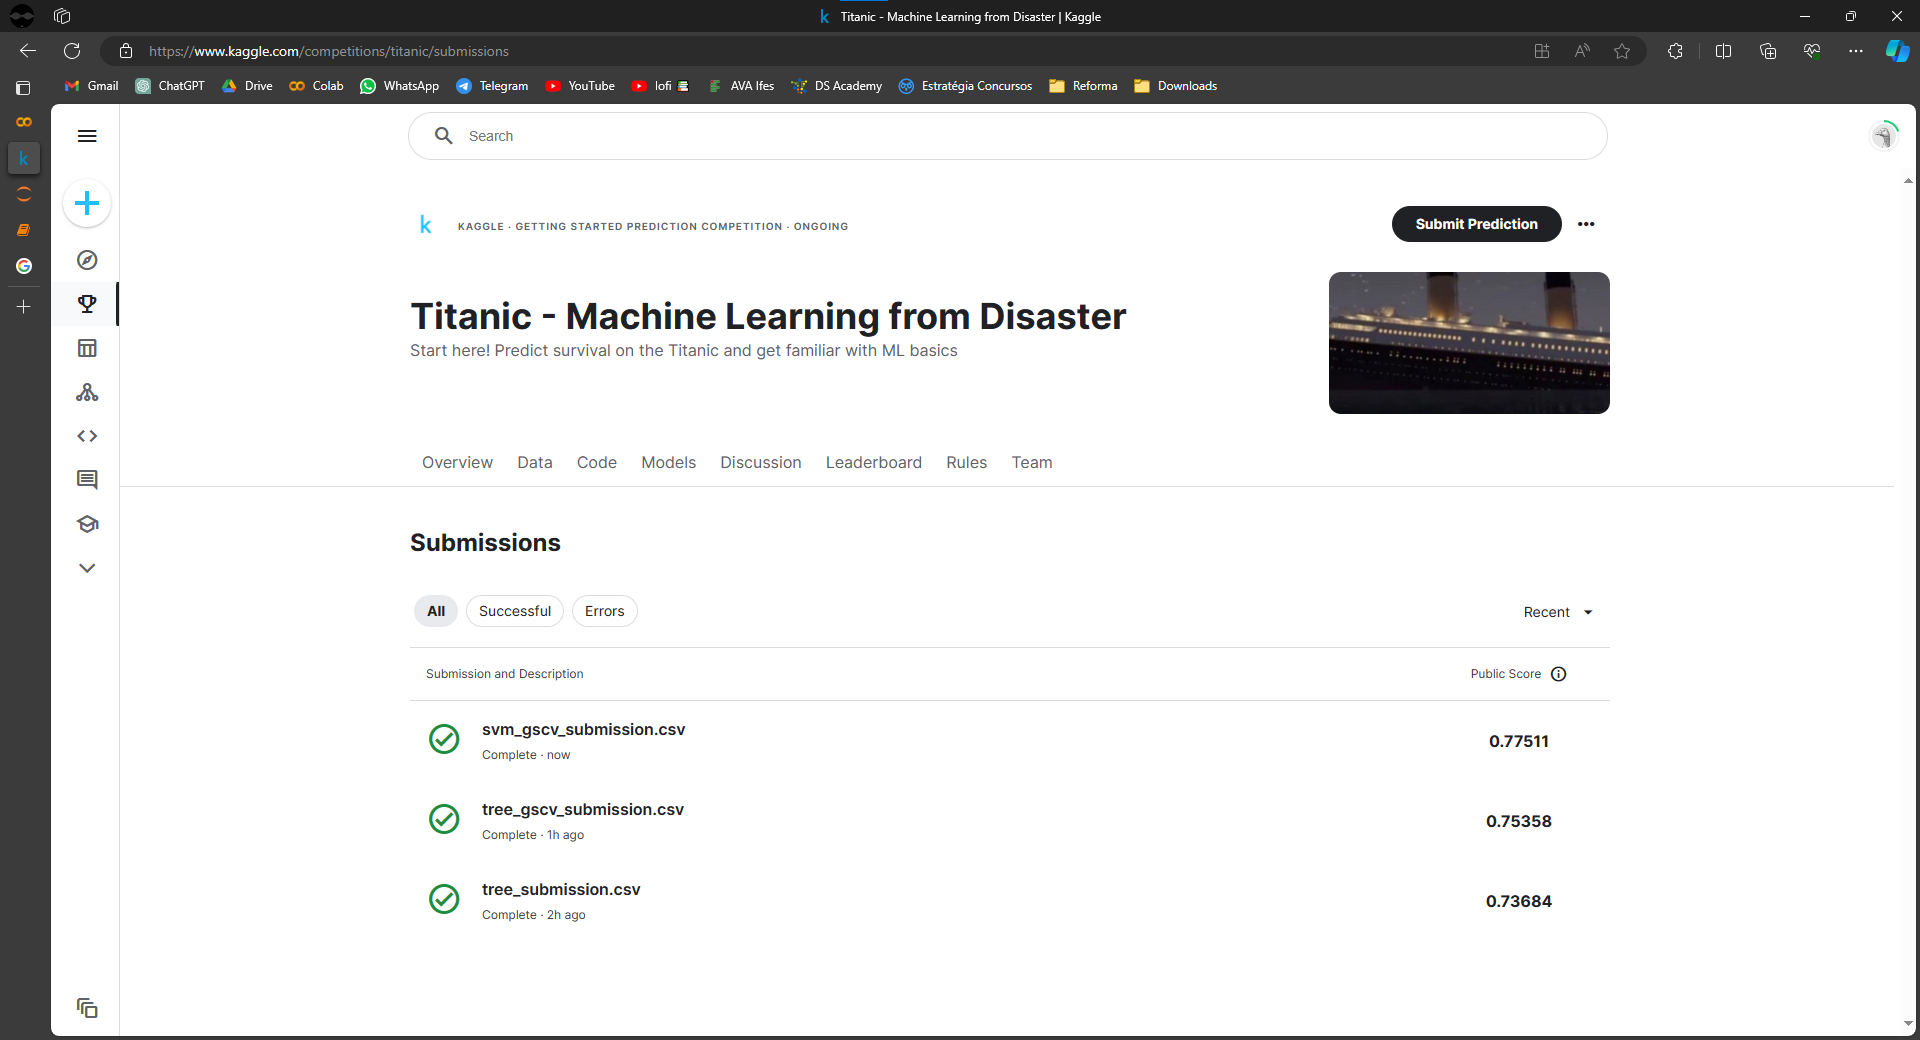